<function matplotlib.pyplot.show(close=None, block=None)>

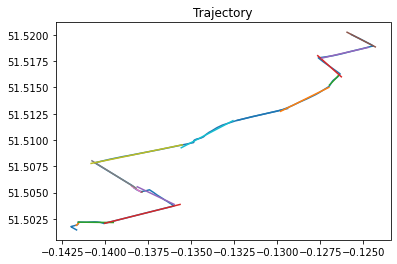

In [128]:
#Question 1
import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt

#british museum to buckingham palace
gpx_file = open('myRouteUK.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

plt.plot(x, y)
# We will break the trajectory into segments by hand here
seg_idx = [6, 10, 28, 34, 55, 60, 76, 92, 121, 170, 187, 211, 220, 238, 256, 265]
            
# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []

# since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w, res1 = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z, res2 = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    
    xp.append(w+res1*(idx_prev-1))
    xp.append(w+res1*idx)
    yp.append(z+res2*(idx_prev-1))
    yp.append(z+res2*idx)
    idx_prev = idx


n = len(xp)
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory") # title
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

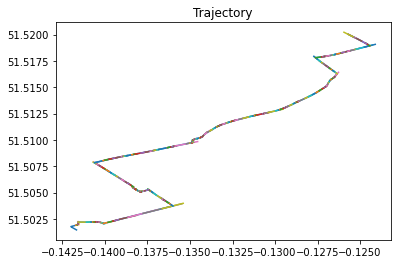

In [13]:
#Question 3
import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt

#british museum to buckingham palace
gpx_file = open('myRouteUK.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

plt.plot(x, y)

# We will break the trajectory into segments by hand here
pointsList = []

# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []

i = flag = 1
e = 1e-7

while True:
    flag+=1
    if (flag > len(x)):
        if pointsList.count(flag-1) == 0:
            pointsList.append(flag-1)
        break
        
    n = flag-i+1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(i-1, flag))
    
    res_w = np.linalg.lstsq(A, x[i-1:flag], rcond=None)[1]
    res_z = np.linalg.lstsq(A, y[i-1:flag], rcond=None)[1]

    if(len(res_w) & len(res_z)) != 0: 
        if(float(res_w+res_z)) > e: 
            pointsList.append(flag)
            continue
            
idx_prev = pointsList[0]
for idx in pointsList[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w, res1 = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z, res2 = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    xp.append(w+res1*(idx_prev-1))
    xp.append(w+res1*idx)
    yp.append(z+res2*(idx_prev-1))
    yp.append(z+res2*idx)
    idx_prev = idx
                
n = len(xp)
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory") # title
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

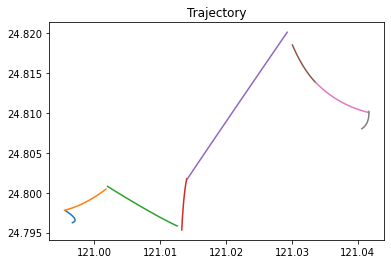

In [14]:
#Question 4
import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt

def drawCurve(tstart, tend, ai, bi):
    tt = range(tstart, tend)
    x = np.zeros(len(tt))
    y = np.zeros(len(tt))
    i = 0
    for t in range(tstart, tend):
        x[i] = ai[0]*t*t + ai[1]*t + ai[2]
        y[i] = bi[0]*t*t + bi[1]*t + bi[2]
        i = i + 1
    return x, y

gpx_file = open('route.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)
            
#plt.plot(x, y)
# We will break the trajectory into segments by hand here
seg_idx = [1, 14, 36, 76, 104, 197, 215, 235, 253]
            
# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []
x_point = []
y_point = []

# since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    
    xp.append(w[0]+w[1]*(idx_prev-1))
    xp.append(w[0]+w[1]*idx)
    yp.append(z[0]+z[1]*(idx_prev-1))
    yp.append(z[0]+z[1]*idx)
    
    t2_coef = np.array([i for i in range (idx_prev-1, idx)])
    t1_coef = np.array([x[i] for i in range (idx_prev-1, idx)])
    t0_coef = np.array([y[i] for i in range (idx_prev-1, idx)])
    
    ai= np.polyfit(t2_coef, t1_coef, 2, rcond=None, full=True)[0]
    bi= np.polyfit(t2_coef, t0_coef, 2, rcond=None, full=True)[0]
    xi, yi = drawCurve(idx_prev-1, idx, ai, bi)
    x_point.append(xi)
    y_point.append(yi)

    idx_prev = idx

n = len(x_point)
for i in range(0, n):
    plt.plot(x_point[i], y_point[i])
plt.title("Trajectory") # title
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

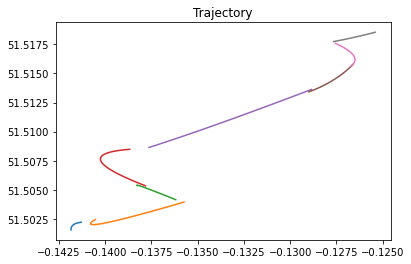

In [12]:
#Question 4
import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt

def drawCurve(tstart, tend, ai, bi):
    tt = range(tstart, tend)
    x = np.zeros(len(tt))
    y = np.zeros(len(tt))
    i = 0
    for t in range(tstart, tend):
        x[i] = ai[0]*t*t + ai[1]*t + ai[2]
        y[i] = bi[0]*t*t + bi[1]*t + bi[2]
        i = i + 1
    return x, y

gpx_file = open('myRouteUK.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)
            
#plt.plot(x, y)
# We will break the trajectory into segments by hand here
seg_idx = [1, 14, 36, 76, 104, 197, 215, 235, 253]
            
# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []
x_point = []
y_point = []

# since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    
    xp.append(w[0]+w[1]*(idx_prev-1))
    xp.append(w[0]+w[1]*idx)
    yp.append(z[0]+z[1]*(idx_prev-1))
    yp.append(z[0]+z[1]*idx)
    
    k = np.array([i for i in range (idx_prev-1, idx)])
    l = np.array([x[i] for i in range (idx_prev-1, idx)])
    m = np.array([y[i] for i in range (idx_prev-1, idx)])
    ai= np.polyfit(k, l, 2, rcond=None, full=True)[0]
    bi= np.polyfit(k, m, 2, rcond=None, full=True)[0]
    xi, yi = drawCurve(idx_prev-1, idx, ai, bi)
    x_point.append(xi)
    y_point.append(yi)

    idx_prev = idx

n = len(x_point)
for i in range(0, n):
    plt.plot(x_point[i], y_point[i])
plt.title("Trajectory") # title
plt.show

In [ ]:
#Question 5
import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt

def drawCurve(tstart, tend, ai, bi):
    tt = range(tstart, tend)
    x = np.zeros(len(tt))
    y = np.zeros(len(tt))
    i = 0
    for t in range(tstart, tend):
        x[i] = ai[0]*t*t + ai[1]*t + ai[2]
        y[i] = bi[0]*t*t + bi[1]*t + bi[2]
        i = i + 1
    return x, y

gpx_file = open('myRouteUK.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)
            
#plt.plot(x, y)
# We will break the trajectory into segments by hand here
seg_idx = [1, 14, 36, 76, 104, 197, 215, 235, 253]
            
# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []
x_point = []
y_point = []

# since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    
    xp.append(w[0]+w[1]*(idx_prev-1))
    xp.append(w[0]+w[1]*idx)
    yp.append(z[0]+z[1]*(idx_prev-1))
    yp.append(z[0]+z[1]*idx)
    
    k = np.array([i for i in range (idx_prev-1, idx)])
    l = np.array([x[i] for i in range (idx_prev-1, idx)])
    m = np.array([y[i] for i in range (idx_prev-1, idx)])
    ai= np.polyfit(k, l, 2, rcond=None, full=True)[0]
    bi= np.polyfit(k, m, 2, rcond=None, full=True)[0]
    xi, yi = drawCurve(idx_prev-1, idx, ai, bi)
    x_point.append(xi)
    y_point.append(yi)

    idx_prev = idx

n = len(x_point)
for i in range(0, n):
    plt.plot(x_point[i], y_point[i])
plt.title("Trajectory") # title
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

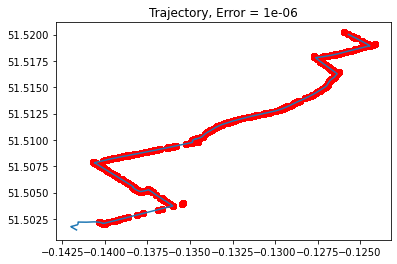

In [21]:
#Question 5
import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt

#british museum to buckingham palace
gpx_file = open('myRouteUK.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

plt.plot(x, y)

# We will break the trajectory into segments by hand here
pointsList = []

# we need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []

i = flag = 1
e = 1e-6

while True:
    flag+=1
    if (flag > len(x)):
        if pointsList.count(flag-1) == 0:
            pointsList.append(flag-1)
        break
        
    n = flag-i+1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(i-1, flag))
    
    res_w = np.linalg.lstsq(A, x[i-1:flag], rcond=None)[1]
    res_z = np.linalg.lstsq(A, y[i-1:flag], rcond=None)[1]

    if(len(res_w) & len(res_z)) != 0: 
        if(float(res_w+res_z)) > e: 
            pointsList.append(flag)
            continue
            
idx_prev = pointsList[0]
for idx in pointsList[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w, res1 = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z, res2 = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    xp.append(w+res1*(idx_prev-1))
    xp.append(w+res1*idx)
    yp.append(z+res2*(idx_prev-1))
    yp.append(z+res2*idx)
    idx_prev = idx
                
n = len(xp)
for i in range(0, n, 2):
    #plt.plot(xp[i:i+2], yp[i:i+2])
    plt.scatter(xp,yp, color= 'red')
plt.title("Trajectory, Error = 1e-06") # title
plt.show